In [38]:
%matplotlib inline

In [40]:
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt

In [48]:

def getData(data):
    """
    This function will take the data extracted from the JSON and put it into a pandas dataframe
    
    Since all the data is coming from a JSON I have decided to grab lat and long every time, this will
    help in the future if new mesonets are added to the system.
    """
    
    #creating empty dataframe
    AllData = pd.DataFrame([], columns=('Station','Latitude','Longitude','Height','Temperature'))
    
    #loop for going through json. Station represents the only variable, mesonet name
    for station in data['currentMesonetConditions']:
        lat    = data['currentMesonetConditions'][station]['latitude']
        lon    = data['currentMesonetConditions'][station]['longitude']
        height = data['currentMesonetConditions'][station]['sitelevation']
        temp   = data['currentMesonetConditions'][station]['temperature']
        AllData = AllData.append({'Station':station,
                                  'Latitude':float(lat),
                                  'Longitude':float(lon),
                                  'Height':int(height),
                                  'Temperature':float(temp)},
                                 ignore_index=True)
        
    return AllData

In [49]:
with urllib.request.urlopen("http://xmountwashington.appspot.com/mesonet-feed.php?callback=1") as url:
    data = json.loads(url.read().decode())
    
MesoDataFrame = getData(data)
mesoDataFrame = MesoDataFrame.sort_values(by=['Height'])

In [50]:
type(mesoDataFrame.Temperature[0])

numpy.float64

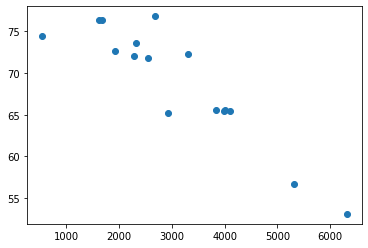

In [51]:
plt.scatter(MesoDataFrame.Height,MesoDataFrame.Temperature)